sepal length (cm)    1
sepal width (cm)     1
petal length (cm)    0
petal width (cm)     1
iris_name            1
dtype: int64
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
148                6.7               3.0                5.2               2.3   
149                6.3               2.5                5.0               1.9   
150                6.5               3.0                5.2               2.0   
151                6.2               3.4                5.4   

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

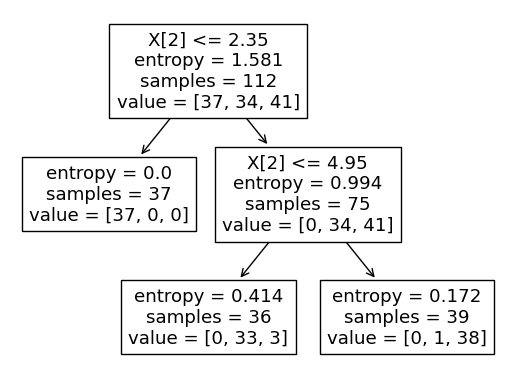

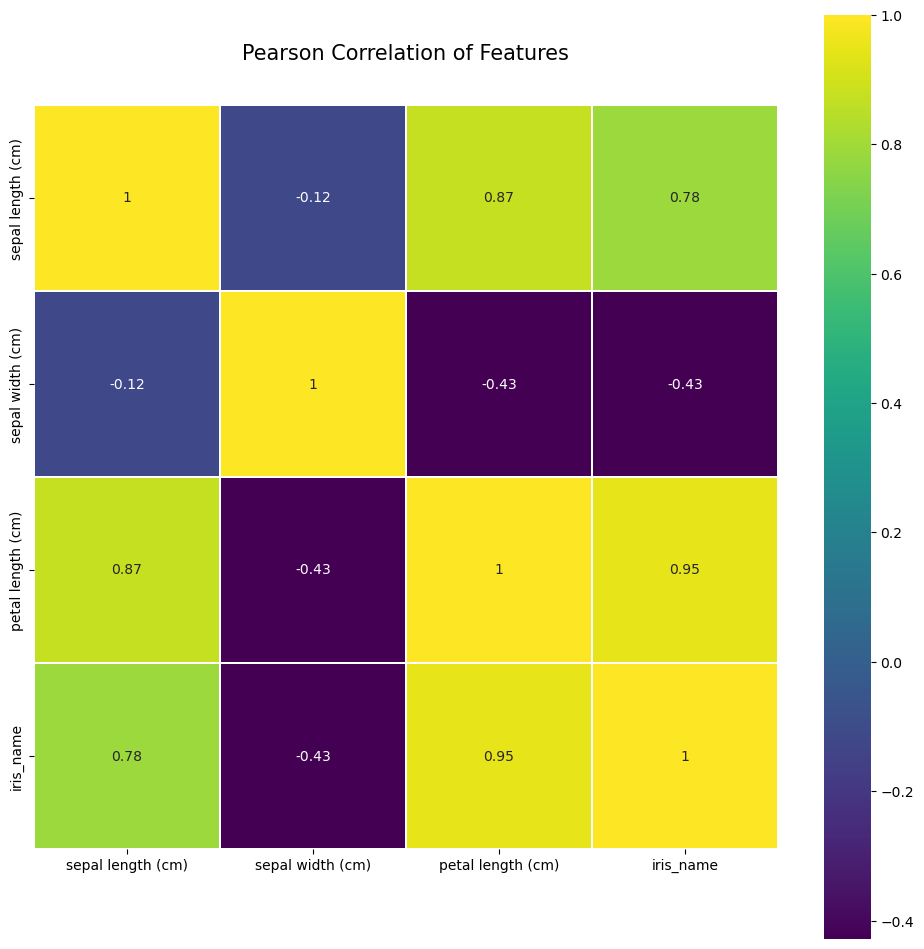

In [42]:
# the imports:

import numpy as np
from sklearn import preprocessing
import seaborn as sns

# pandas for handling the data
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is a Python data visualization library that offers a user-friendly interface 
#    for generating visually appealing and informative statistical graphics.
import seaborn as sns

# From sklearn we import some classes and functions for data handling, the tree classifier, 
#    the accuracy and the plot function to depict the tree  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 

# This class we use it to search exhaustive over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV 


#read the csv file
#exercise 1
df_iris = pd.read_csv('iris_teach_2.csv')


#count the empty cells on columns
#exercise 2
print(df_iris.isnull().sum())


#remove empty cells
#exercise 3
df_iris = df_iris.dropna()

print(df_iris)

print(df_iris.isnull().sum())

#divide the dataset in 2 sets
#exercise 4

x_data = df_iris.drop(['iris_name'], axis=1)

y_data = df_iris['iris_name']

#encoder for y
#exercise 5

le = preprocessing.LabelEncoder()
y_data = le.fit_transform(y_data)

#train and test data
#exercise 6

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

#exercises 7 and 8

#drop column petal width (cm)
df_iris = df_iris.drop(['petal width (cm)'], axis = 1)

#create data sets
x_data = df_iris.drop(['iris_name'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=0)

# Define the hyperparameters to search over 
param_grid = {"max_depth": [1, 2, 3, 4, 5, 6, 7]} 
# Create a grid search object 
grid_search = GridSearchCV(tree_clf, param_grid, cv=5) 
# Fit the grid search object to the training data 
grid_search.fit(X_train, y_train) 
# Print the best hyperparameters found by the grid search 
print("Best hyperparameters:", grid_search.best_params_)

# Create a new decision tree classifier object with the best hyperparameters 
tree_clf_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42) 
# Fit the classifier to the training data 
tree_clf_tuned.fit(X_train, y_train)

plot_tree(tree_clf_tuned)

df_clean_iris_set = x_data.copy()
df_clean_iris_set['iris_name']=y_data
df_clean_iris_set.head()

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_clean_iris_set.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)